In [129]:
import matplotlib 
import matplotlib.pyplot as plt
import pandas as pd 
import seaborn as sns
pd.plotting.backend = "matplotlib"


In [130]:
# import matplotlib
# matplotlib.use('Agg')  # Use a non-interactive backend
# import matplotlib.pyplot as plt
# plt.switch_backend('Agg')  # Switch backend if needed


In [131]:
Customer = pd.read_csv('Customers.csv', encoding='mac_roman')
Exchange = pd.read_csv('Exchange_Rates.csv', encoding='mac_roman')
Products = pd.read_csv('Products.csv', encoding='mac_roman')
Sales = pd.read_csv('Sales.csv', encoding='mac_roman')
Stores = pd.read_csv('Stores.csv', encoding='mac_roman')


In [132]:
Customer.head()

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965


In [133]:
Exchange.head()

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415


In [134]:
Products.head()

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio


In [135]:
Products["Unit Cost USD"] = Products["Unit Cost USD"].str.lstrip("$").str.replace(",", "").astype(float)
Products["Unit Price USD"] = Products["Unit Price USD"].str.lstrip("$").str.replace(",", "").astype(float)

In [136]:
Products['Profit'] = Products['Unit Price USD'] - Products['Unit Cost USD']
Products['Percent Profit'] = Products['Profit'] / Products['Unit Cost USD']

In [137]:
Sales.head(20)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
5,366002,3,1/1/2016,1/12/2016,266019,0,1080,4,CAD
6,366004,1,1/1/2016,NaN,1107461,38,163,6,GBP
7,366004,2,1/1/2016,NaN,1107461,38,1529,2,GBP
8,366005,1,1/1/2016,NaN,844003,33,421,4,EUR
9,366007,1,1/1/2016,NaN,2035771,43,1617,1,USD


In [138]:
Stores.head(-1)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
5,6,Australia,Western Australia,2000.0,1/1/2010
6,7,Canada,New Brunswick,1105.0,5/7/2007
7,8,Canada,Newfoundland and Labrador,2105.0,7/2/2014
8,9,Canada,Northwest Territories,1500.0,3/4/2005
9,10,Canada,Nunavut,1210.0,4/4/2015


In [139]:
all_dfs = [Customer, Exchange, Products, Sales, Stores]
for df in all_dfs:
    print(f"DataFrame: {df.shape[0]} rows, {df.shape[1]} columns")
    print(df.isna().sum(), "\n")

DataFrame: 15266 rows, 10 columns
CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64 

DataFrame: 11215 rows, 3 columns
Date        0
Currency    0
Exchange    0
dtype: int64 

DataFrame: 2517 rows, 12 columns
ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
Profit            0
Percent Profit    0
dtype: int64 

DataFrame: 62884 rows, 9 columns
Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64 

DataFrame: 67 rows, 5 columns
StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64 

In [140]:
Stores.columns

Index(['StoreKey', 'Country', 'State', 'Square Meters', 'Open Date'], dtype='object')

In [141]:
Sales_in_Store = Sales.merge(Stores, on='StoreKey', how='left')

In [142]:
Sales_in_Store.head(20)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Country,State,Square Meters,Open Date
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD,Canada,Nunavut,1210.0,4/4/2015
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD,Online,Online,NaN,1/1/2010
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD,Online,Online,NaN,1/1/2010
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD,Online,Online,NaN,1/1/2010
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD,Online,Online,NaN,1/1/2010
5,366002,3,1/1/2016,1/12/2016,266019,0,1080,4,CAD,Online,Online,NaN,1/1/2010
6,366004,1,1/1/2016,NaN,1107461,38,163,6,GBP,United Kingdom,Belfast,1800.0,4/4/2015
7,366004,2,1/1/2016,NaN,1107461,38,1529,2,GBP,United Kingdom,Belfast,1800.0,4/4/2015
8,366005,1,1/1/2016,NaN,844003,33,421,4,EUR,Netherlands,Friesland,1540.0,12/9/2015
9,366007,1,1/1/2016,NaN,2035771,43,1617,1,USD,United States,Alaska,1190.0,1/1/2015


In [143]:
Sales_Store_Products = Sales_in_Store.merge(Products, on='ProductKey', how='left')

In [144]:
Products.iloc[1047]

ProductKey                                   1048
Product Name      A. Datum SLR Camera X136 Silver
Brand                                    A. Datum
Color                                      Silver
Unit Cost USD                              141.47
Unit Price USD                              427.0
SubcategoryKey                                402
Subcategory                   Digital SLR Cameras
CategoryKey                                     4
Category                   Cameras and camcorders
Profit                                     285.53
Percent Profit                           2.018308
Name: 1047, dtype: object

In [145]:
Sales_Store_Products['Profit'] = (Sales_Store_Products['Unit Price USD'] - Sales_Store_Products['Unit Cost USD']) * Sales_Store_Products['Quantity']
Sales_Store_Products['Percent Profit'] = Sales_Store_Products['Profit'] / Sales_Store_Products['Unit Cost USD']

In [146]:
Sales_Store_Products.head(20)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Country,...,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category,Profit,Percent Profit
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD,Canada,...,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders,36.73,1.174608
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD,Online,...,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders,571.06,4.036616
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD,Online,...,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances,445.30,2.018220
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD,Online,...,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders,1217.44,8.221502
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD,Online,...,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers,159.80,0.961492
5,366002,3,1/1/2016,1/12/2016,266019,0,1080,4,CAD,Online,...,Contoso,Silver,214.03,646.00,402,Digital SLR Cameras,4,Cameras and camcorders,1727.88,8.073074
6,366004,1,1/1/2016,NaN,1107461,38,163,6,GBP,United Kingdom,...,Adventure Works,White,527.53,1592.20,201,Televisions,2,TV and Video,6388.02,12.109302
7,366004,2,1/1/2016,NaN,1107461,38,1529,2,GBP,United Kingdom,...,The Phone Company,Black,117.27,255.00,504,Smart phones & PDAs,5,Cell phones,275.46,2.348938
8,366005,1,1/1/2016,NaN,844003,33,421,4,EUR,Netherlands,...,Adventure Works,Silver,215.68,469.00,303,Desktops,3,Computers,1013.28,4.698071
9,366007,1,1/1/2016,NaN,2035771,43,1617,1,USD,United States,...,Contoso,Silver,26.67,57.99,602,Movie DVD,6,"Music, Movies and Audio Books",31.32,1.174353


In [147]:
Profit_Store_Sum = Sales_Store_Products.groupby(["StoreKey"])[["Profit"]].sum().reset_index()#.sum().sort_values(by="Profit", ascending=False) , "Percent Profit"

In [148]:
Qunat_Store_Sum = Sales_Store_Products.groupby(["StoreKey"])[["Quantity"]].sum().reset_index()

In [149]:
avg_profit_per_store = Sales_Store_Products.groupby(["StoreKey"])[["Profit"]].mean().reset_index()
avg_profit_per_store

,StoreKey,Profit
0,0,506.850941
1,1,484.094658
2,2,528.478333
3,4,618.031671
4,5,571.701222
5,6,514.524358
6,8,531.677360
7,9,491.285701
8,10,477.777147
9,12,478.055937


C:\Users\cypri\AppData\Local\Temp\ipykernel_11936\3428490639.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '8'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17'),
 Text(15, 0, '18'),
 Text(16, 0, '19'),
 Text(17, 0, '20'),
 Text(18, 0, '21'),
 Text(19, 0, '22'),
 Text(20, 0, '23'),
 Text(21, 0, '24'),
 Text(22, 0, '26'),
 Text(23, 0, '27'),
 Text(24, 0, '28'),
 Text(25, 0, '29'),
 Text(26, 0, '30'),
 Text(27, 0, '31'),
 Text(28, 0, '32'),
 Text(29, 0, '33'),
 Text(30, 0, '34'),
 Text(31, 0, '36'),
 Text(32, 0, '37'),
 Text(33, 0, '38'),
 Text(34, 0, '39'),
 Text(35, 0, '40'),
 Text(36, 0, '41'),
 Text(37, 0, '42'),
 Text(38, 0, '43'),
 Text(39, 0, '44'),
 Text(40, 0, '45'),
 Text(41, 0, '47'),
 Text(42, 0, '48'),
 Text(43, 0, '49'),
 Text(44, 0, '50'),
 Text(45, 0, '51'),
 Text(46, 0, '53'),
 Text(47, 0, '54'),
 Text(48, 0, '55'),
 Text(49, 0, '56'),
 Text(50, 0, '57')

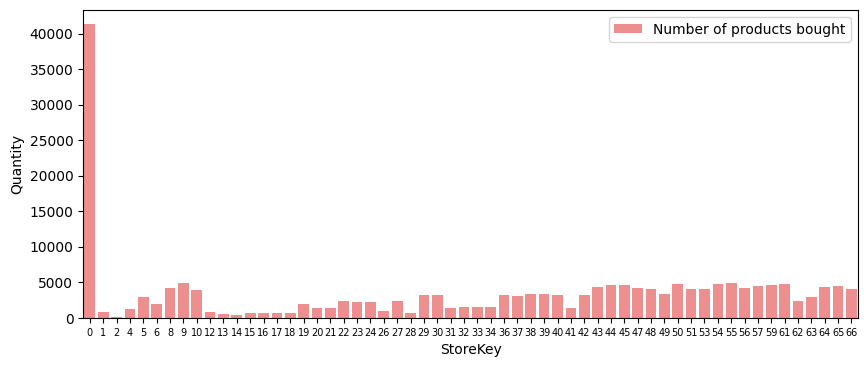

In [150]:
# fig, ax = plt.subplots()
# fig.set_size_inches(12, 6)
# ax.bar(Profit_Store_Sum["StoreKey"], Profit_Store_Sum["Profit"], width = width, label = 'Profit')
# plt.bar(Qunat_Store_Sum[~AUX]["StoreKey"], Qunat_Store_Sum[~AUX]["Quantity"], label = 'Number of Products Sold')
# plt.show()
plt.figure(figsize=(10,4))
ax = sns.barplot(x="StoreKey", y="Quantity", data=Qunat_Store_Sum, color='red', label='Number of products bought', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"

C:\Users\cypri\AppData\Local\Temp\ipykernel_11936\2998078267.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '4'),
 Text(3, 0, '5'),
 Text(4, 0, '6'),
 Text(5, 0, '8'),
 Text(6, 0, '9'),
 Text(7, 0, '10'),
 Text(8, 0, '12'),
 Text(9, 0, '13'),
 Text(10, 0, '14'),
 Text(11, 0, '15'),
 Text(12, 0, '16'),
 Text(13, 0, '17'),
 Text(14, 0, '18'),
 Text(15, 0, '19'),
 Text(16, 0, '20'),
 Text(17, 0, '21'),
 Text(18, 0, '22'),
 Text(19, 0, '23'),
 Text(20, 0, '24'),
 Text(21, 0, '26'),
 Text(22, 0, '27'),
 Text(23, 0, '28'),
 Text(24, 0, '29'),
 Text(25, 0, '30'),
 Text(26, 0, '31'),
 Text(27, 0, '32'),
 Text(28, 0, '33'),
 Text(29, 0, '34'),
 Text(30, 0, '36'),
 Text(31, 0, '37'),
 Text(32, 0, '38'),
 Text(33, 0, '39'),
 Text(34, 0, '40'),
 Text(35, 0, '41'),
 Text(36, 0, '42'),
 Text(37, 0, '43'),
 Text(38, 0, '44'),
 Text(39, 0, '45'),
 Text(40, 0, '47'),
 Text(41, 0, '48'),
 Text(42, 0, '49'),
 Text(43, 0, '50'),
 Text(44, 0, '51'),
 Text(45, 0, '53'),
 Text(46, 0, '54'),
 Text(47, 0, '55'),
 Text(48, 0, '56'),
 Text(49, 0, '57'),
 Text(50, 0, '59'

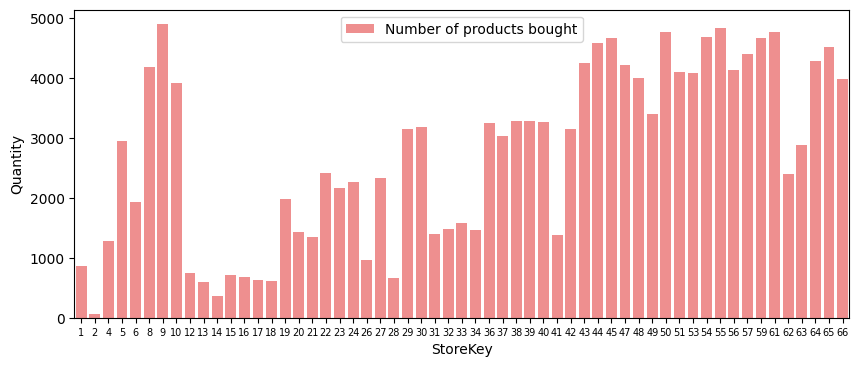

In [151]:
AUX = Qunat_Store_Sum.index.isin([0])
plt.figure(figsize=(10,4))
ax = sns.barplot(x="StoreKey", y="Quantity", data=Qunat_Store_Sum[~AUX], color='red', label='Number of products bought', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"

C:\Users\cypri\AppData\Local\Temp\ipykernel_11936\305856429.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '8'),
 Text(7, 0, '9'),
 Text(8, 0, '10'),
 Text(9, 0, '12'),
 Text(10, 0, '13'),
 Text(11, 0, '14'),
 Text(12, 0, '15'),
 Text(13, 0, '16'),
 Text(14, 0, '17'),
 Text(15, 0, '18'),
 Text(16, 0, '19'),
 Text(17, 0, '20'),
 Text(18, 0, '21'),
 Text(19, 0, '22'),
 Text(20, 0, '23'),
 Text(21, 0, '24'),
 Text(22, 0, '26'),
 Text(23, 0, '27'),
 Text(24, 0, '28'),
 Text(25, 0, '29'),
 Text(26, 0, '30'),
 Text(27, 0, '31'),
 Text(28, 0, '32'),
 Text(29, 0, '33'),
 Text(30, 0, '34'),
 Text(31, 0, '36'),
 Text(32, 0, '37'),
 Text(33, 0, '38'),
 Text(34, 0, '39'),
 Text(35, 0, '40'),
 Text(36, 0, '41'),
 Text(37, 0, '42'),
 Text(38, 0, '43'),
 Text(39, 0, '44'),
 Text(40, 0, '45'),
 Text(41, 0, '47'),
 Text(42, 0, '48'),
 Text(43, 0, '49'),
 Text(44, 0, '50'),
 Text(45, 0, '51'),
 Text(46, 0, '53'),
 Text(47, 0, '54'),
 Text(48, 0, '55'),
 Text(49, 0, '56'),
 Text(50, 0, '57')

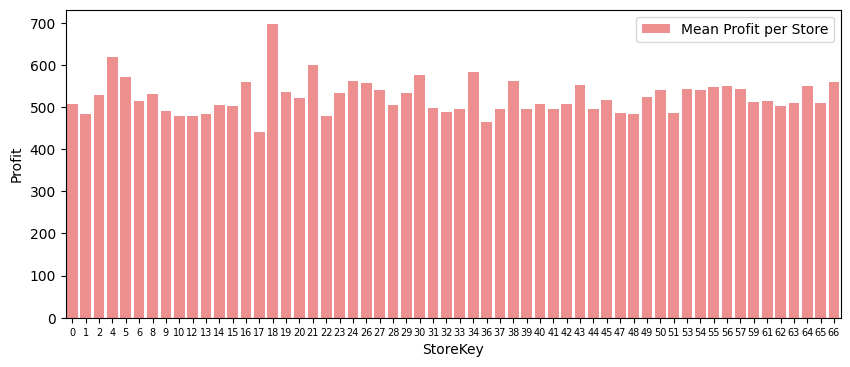

In [152]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x="StoreKey", y="Profit", data=avg_profit_per_store, color='red', label='Mean Profit per Store', alpha=0.5)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=7)#, rotation=40, ha="right"

In [153]:
Stores.set_index("StoreKey", inplace=True)
Qunat_Store_Sum.set_index("StoreKey", inplace=True)
avg_profit_per_store.set_index("StoreKey", inplace=True)

In [154]:
Stores["average_profit"] = avg_profit_per_store["Profit"]
Stores["Quantity"] = Qunat_Store_Sum["Quantity"]

In [155]:
pd.set_option("display.max_rows", None)
Stores.groupby(["Country"]).apply(lambda x: x, include_groups=False)

State  Square Meters  \
Country        StoreKey                                                
Australia      1         Australian Capital Territory          595.0   
               2                   Northern Territory          665.0   
               3                      South Australia         2000.0   
               4                             Tasmania         2000.0   
               5                             Victoria         2000.0   
               6                    Western Australia         2000.0   
Canada         7                        New Brunswick         1105.0   
               8            Newfoundland and Labrador         2105.0   
               9                Northwest Territories         1500.0   
               10                             Nunavut         1210.0   
               11                               Yukon         1210.0   
France         12                     Basse-Normandie          350.0   
               13                               Corse          245.0   
               14                      Franche-Comt√©          350.0   
               15                         La R√©union          400.0   
               16                            Limousin          385.0   
               17                          Martinique          350.0   
               18                             Mayotte          310.0   
Germany        19                              Berlin         1295.0   
               20                         Brandenburg         1715.0   
               21             Freie Hansestadt Bremen          560.0   
               22                Freistaat Th√ºringen         2000.0   
               23                             Hamburg         1365.0   
               24                              Hessen         1855.0   
               25              Mecklenburg-Vorpommern         1610.0   
               26                            Saarland          350.0   
               27                      Sachsen-Anhalt         2000.0   
Italy          28                       Caltanissetta         1200.0   
               29                                Enna         1000.0   
               30                              Pesaro         2100.0   
Netherlands    31                             Drenthe         1085.0   
               32                           Flevoland          910.0   
               33                           Friesland         1540.0   
               34                           Groningen         1365.0   
               35                             Zeeland         1225.0   
Online         0                               Online            NaN   
United Kingdom 36                              Armagh         1300.0   
               37                            Ayrshire         2100.0   
               38                             Belfast         1800.0   
               39                       Blaenau Gwent         2100.0   
               40          Dungannon and South Tyrone         1300.0   
               41                           Fermanagh         2100.0   
               42                          North Down         1900.0   
United States  43                              Alaska         1190.0   
               44                            Arkansas         2000.0   
               45                         Connecticut         2000.0   
               46                            Delaware         1015.0   
               47                              Hawaii         1120.0   
               48                               Idaho         1540.0   
               49                                Iowa         2000.0   
               50                              Kansas         2000.0   
               51                               Maine         1295.0   
               52                         Mississippi         2000.0   
               53                             Montana         1260.0   
               5